In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer


In [48]:
# Q1. Assign a type to each of the following features (a) Model, (b) Type, (c) Max. Price and (d) Airbags from the following: ordinal/nominal/ratio/interval scale.
# a) Model - Nominal
# b) Type - Nominal
# c) Max. Price - Ratio
# d) Airbags - Nominal

In [4]:
# load the dataset
ds_cars = pd.read_csv("../datasets/Cars93.csv")

<Axes: >

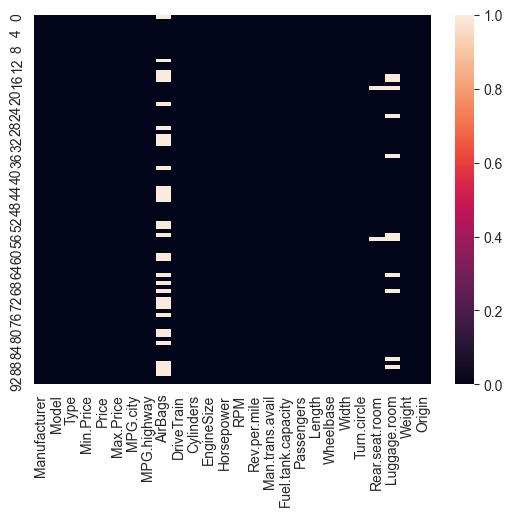

In [49]:
# Finding the columns which has NaN columns
sns.heatmap(ds_cars.isnull())
# As visible from the graph columns like AirBags, Rear.Seat.room, Luggage.room has null values
# Out of which AirBags is an Object field and the rest in number field

Handling missing values in column: AirBags
Handling missing values in column: Rear.seat.room
Handling missing values in column: Luggage.room


<Axes: >

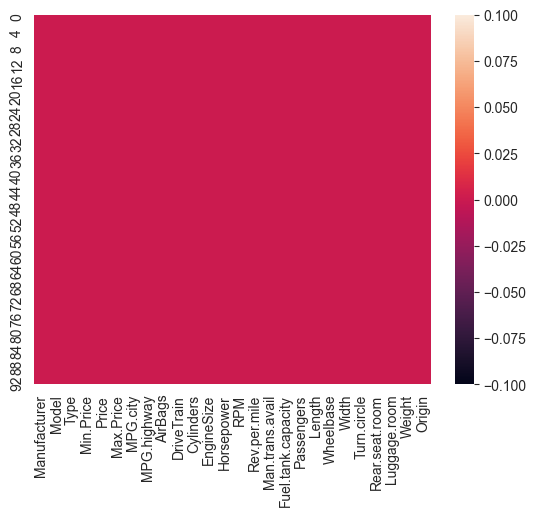

In [50]:
# Q2. Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).

def handle_numerical_missing_values(df):
    df_copy = df.copy()  # To avoid modifying the original DataFrame
    col_impute = []
    for col in df_copy.columns:
        if df_copy[col].isnull().any():  # Check if there are any missing values in the column
            print(f"Handling missing values in column: {col}")

            if pd.api.types.is_numeric_dtype(df_copy[col]):
                col_impute.append(col)  # Correct assignment
    si = SimpleImputer(strategy="mean")
    df_copy[col_impute] = si.fit_transform(df_copy[col_impute])
    return df_copy

## impute numerical values with mode
ds_cars_copy = handle_numerical_missing_values(ds_cars)

## Fill AirBag na values with No AirBag
ds_cars_copy['AirBags'] = ds_cars_copy['AirBags'].fillna('No AirBag')
sns.heatmap(ds_cars_copy.isnull())


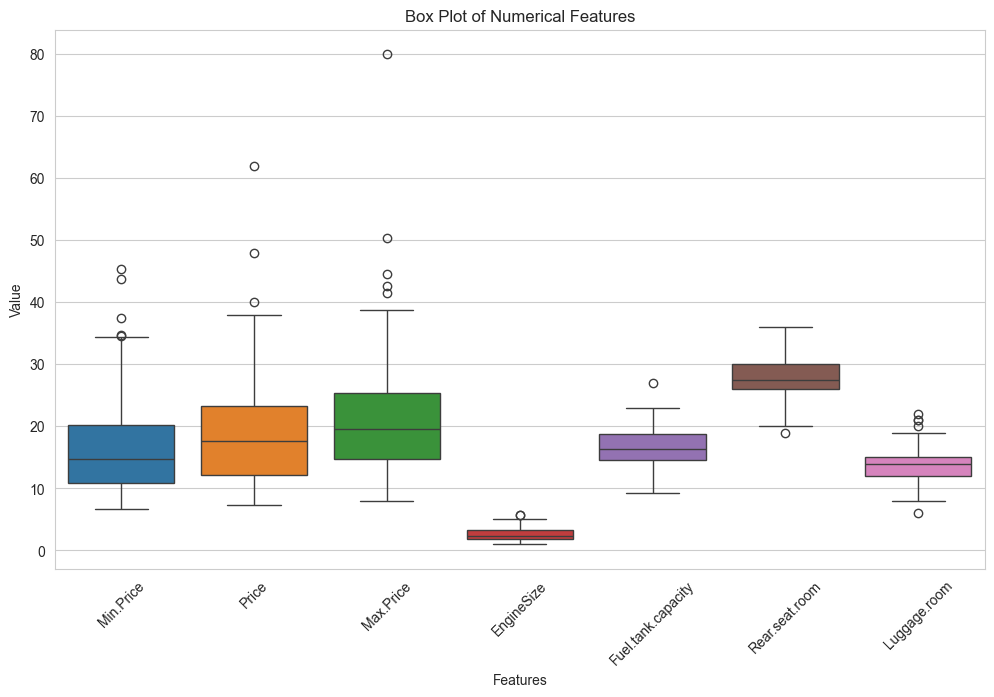

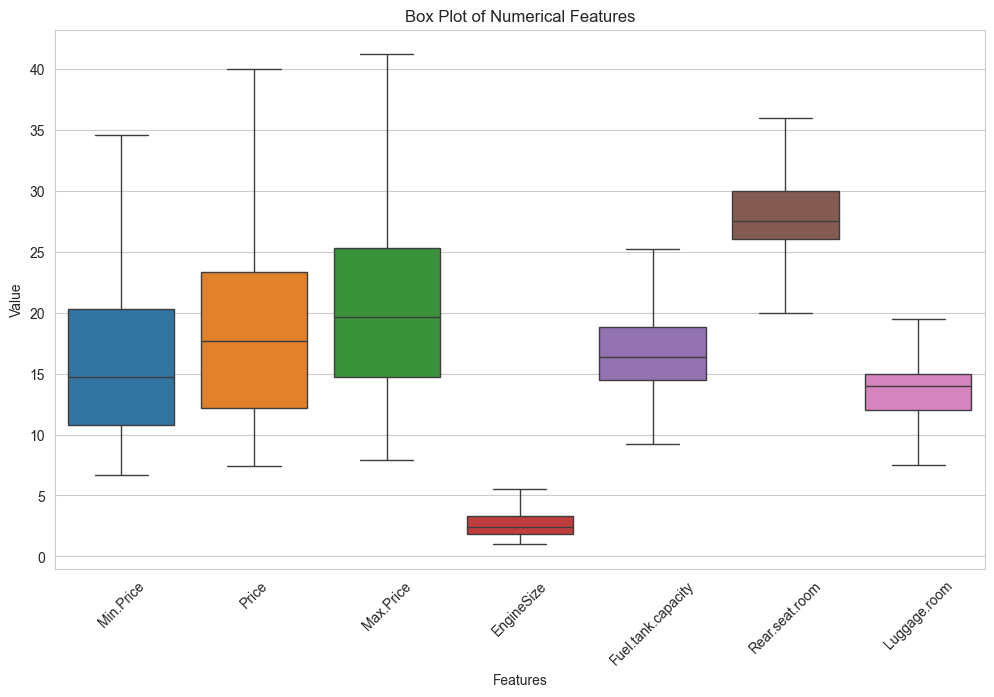

In [56]:
# 3. Write a function to reduce noise (any error in the feature) in individual attributes.

import numpy as np
import pandas as pd

def create_boxplot(df):
    df_copy = df.copy()
    num_cols = df_copy.select_dtypes(include="float64").columns
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df_copy[num_cols])
    plt.xticks(rotation=45)
    plt.title("Box Plot of Numerical Features")
    plt.ylabel("Value")
    plt.xlabel("Features")
    plt.show()

def replace_outliers_iqr(df):
    for column in df.select_dtypes(include="float64").columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the bounds
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])  # Replace values below lower bound
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])  # Replace values above upper bound

    return df

# Example usage
# Assuming 'df' is your DataFrame and 'Price' is the column to remove outliers from

df_copy = ds_cars_copy.copy(deep=True)
create_boxplot(ds_cars_copy)
df_replaced = replace_outliers_iqr(df_copy)
create_boxplot(df_replaced)



In [37]:
# 4. Write a function to encode all the categorical features in the dataset according to the type of variable jointly.

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df, nominal_features=None, ordinal_features=None):
    df_encoded = df.copy()

    # Label Encoding for nominal features
    if nominal_features:
        label_encoder = LabelEncoder()
        for feature in nominal_features:
            df_encoded[feature] = label_encoder.fit_transform(df_encoded[feature])

    # Ordinal Encoding for ordinal features
    if ordinal_features:
        for feature, categories in ordinal_features.items():
            ordinal_encoder = OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=-1)
            df_encoded[feature] = ordinal_encoder.fit_transform(df_encoded[[feature]]).flatten()

    return df_encoded


# Define nominal and ordinal features
nominal_features = ["Manufacturer", "Type"]
ordinal_features = {
    "Cylinders": ["3", "4", "5", "6", "8"],  # Ordered categories
    "DriveTrain": ["4WD", "Front", "Rear"]   # Ordered categories
}

# Encode categorical features
encoded_data = encode_categorical_features(df_replaced, nominal_features, ordinal_features)
print(encoded_data)

    Manufacturer    Model  Type  Min.Price  Price  Max.Price  MPG.city  \
0              0  Integra     3       12.9   15.9       18.8        25   
1              0   Legend     2       29.2   33.9       38.7        18   
2              1       90     0       25.9   29.1       32.3        20   
3              1      100     2       30.8   37.7       41.2        19   
4              2     535i     2       23.7   30.0       36.2        22   
..           ...      ...   ...        ...    ...        ...       ...   
88            30  Eurovan     5       16.6   19.7       22.7        17   
89            30   Passat     0       17.6   20.0       22.4        21   
90            30  Corrado     4       22.9   23.3       23.7        18   
91            31      240     0       21.8   22.7       23.5        21   
92            31      850     2       24.8   26.7       28.5        20   

    MPG.highway             AirBags  DriveTrain  ...  Fuel.tank.capacity  \
0            31           No AirBag

In [60]:
# 5 Write a function to normalize / scale the features either individually or jointly.

from sklearn.preprocessing import StandardScaler

def scale_features(df):

    df_scale = df.copy()

    scaler = StandardScaler()
    float_column = df_scale.select_dtypes(include="float64").columns
    for column in float_column:
        df_scale[column] = scaler.fit_transform(df_scale[column].values.reshape(-1, 1))
    int_column = df_scale.select_dtypes(include="int64").columns
    for column in int_column:
        df_scale[column] = scaler.fit_transform(df_scale[column].values.reshape(-1, 1))
    return df_scale

# Scale the features
final_data = scale_features(encoded_data.reset_index(drop=True))
final_data.describe()

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,DriveTrain,Cylinders,EngineSize,...,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,...,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01
mean,8.117760e-17,-1.002782e-16,9.908442e-17,-5.252668e-17,-1.193788e-16,-2.709899e-16,-1.790682e-18,1.117684e-16,9.535383e-17,-4.906469e-16,...,3.792516e-16,3.390358e-16,1.107239e-16,-9.086220e-16,-9.210076e-16,3.247104e-16,1.083960e-15,9.789063e-17,5.610805e-17,-1.671303e-16
std,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,...,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00
min,-1.669930e+00,-1.526587e+00,-1.265896e+00,-1.378313e+00,-1.494588e+00,-1.317751e+00,-1.713379e+00,-2.028450e+00,-2.445828e+00,-1.627924e+00,...,-2.049702e+00,-2.321997e+00,-2.986345e+00,-2.905899e+00,-2.056085e+00,-2.494628e+00,-2.170066e+00,-2.694463e+00,-2.440386e+00,-2.348499e+00
25%,-7.748089e-01,-8.783101e-01,-7.558457e-01,-8.170039e-01,-7.376589e-01,-7.810321e-01,-5.819406e-01,-1.229364e-01,-7.355875e-01,-8.455107e-01,...,-7.030848e-01,-6.691522e-01,-1.050944e+00,-6.337452e-01,-8.766498e-01,-6.322394e-01,-6.104359e-01,-6.324853e-01,-7.087579e-01,-7.719286e-01
50%,-2.153584e-01,-2.300336e-01,-2.706758e-01,-1.738373e-01,-1.922246e-01,-2.443130e-01,-2.047944e-01,-1.229364e-01,-7.355875e-01,-2.587010e-01,...,1.578620e-02,-7.662304e-02,-8.324306e-02,-1.406677e-02,-1.395030e-01,-1.001284e-01,1.341617e-02,-1.169908e-01,6.085448e-02,-5.608028e-02
75%,7.916526e-01,4.182429e-01,4.259784e-01,4.810233e-01,4.422602e-01,4.713125e-01,3.609249e-01,-1.229364e-01,9.746534e-01,6.215135e-01,...,4.714087e-01,6.718349e-01,8.844575e-01,6.056117e-01,8.925025e-01,6.980381e-01,6.372682e-01,7.421667e-01,4.456607e-01,7.705541e-01
max,1.798664e+00,1.714796e+00,2.198715e+00,2.428064e+00,2.212139e+00,4.228346e+00,3.943814e+00,1.782577e+00,1.829774e+00,2.822050e+00,...,2.881145e+00,2.683316e+00,2.819859e+00,2.464647e+00,2.219367e+00,2.294371e+00,1.884972e+00,2.804145e+00,2.177289e+00,1.759107e+00


In [61]:
# Q6. Write a function to create a random split of the data into train, validation and test sets in the ratio of [70:20:10]

from sklearn.model_selection import train_test_split

def split_data(df):
    X = df.drop(columns=["Price"])  # Features (all columns except 'Price')
    y = df["Price"]

    # First, split the data into 70% training and 30% temporary (validation + test)
    X_train, X_temp, Y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

    # Then, split the temporary data into 20% validation and 10% test
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)
    return X_train, Y_train, X_val, y_val, X_test, y_test

X_train, Y_train, X_val, y_val, X_test, y_test = split_data(final_data)
print(X_train) #65
print(X_val) # 18
print(X_test) # 10

    Manufacturer         Model      Type  Min.Price  Max.Price  MPG.city  \
31     -0.551029        Escort  0.418243  -1.054412  -1.049336  0.113500   
77      1.127323           900 -1.526587   0.425978   1.755755 -0.423219   
9      -1.222369       DeVille -0.878310   2.005891   1.666705 -1.138845   
70      0.791653  Eighty-Eight -0.878310   0.326456   0.063796 -0.602126   
5      -1.334259       Century -0.230034  -0.332877  -0.448245 -0.065407   
..           ...           ...       ...        ...        ...       ...   
20     -0.886699       LeBaron -1.526587  -0.295556  -0.470507  0.113500   
60      0.455982        Cougar -0.230034  -0.245795  -0.715396 -0.602126   
71      0.903543         Laser  1.066519  -0.681204  -0.437113  0.113500   
14     -1.110479        Lumina -0.230034  -0.432399  -0.325800 -0.244313   
51      0.120312      Town_Car -0.878310   2.180054   1.833674 -0.781032   

    MPG.highway             AirBags  DriveTrain  Cylinders  ...  \
31     0.172352     